In [1]:
import pickle as pkl
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import os
import csv

In [2]:
Error_mean_path = '../results/pkls/Error_mean_group.pkl'
Error_std_path = '../results/pkls/Error_std_group.pkl'

with open(Error_mean_path, 'rb') as g:
    Error = pkl.load(g)
g.close()
with open(Error_std_path, 'rb') as f:
    Error_std = pkl.load(f)
f.close()

# Visulisation

dict_keys(['Error_blazeOpen_par_mvt', 'Error_KintOpen_par_mvt', 'Error_blazeKint_sansP_par_mvt', 'Error_blazeKint_avecP_par_mvt'])
7
[ 1.5  3.5  5.5  7.5  9.5 11.5 13.5]


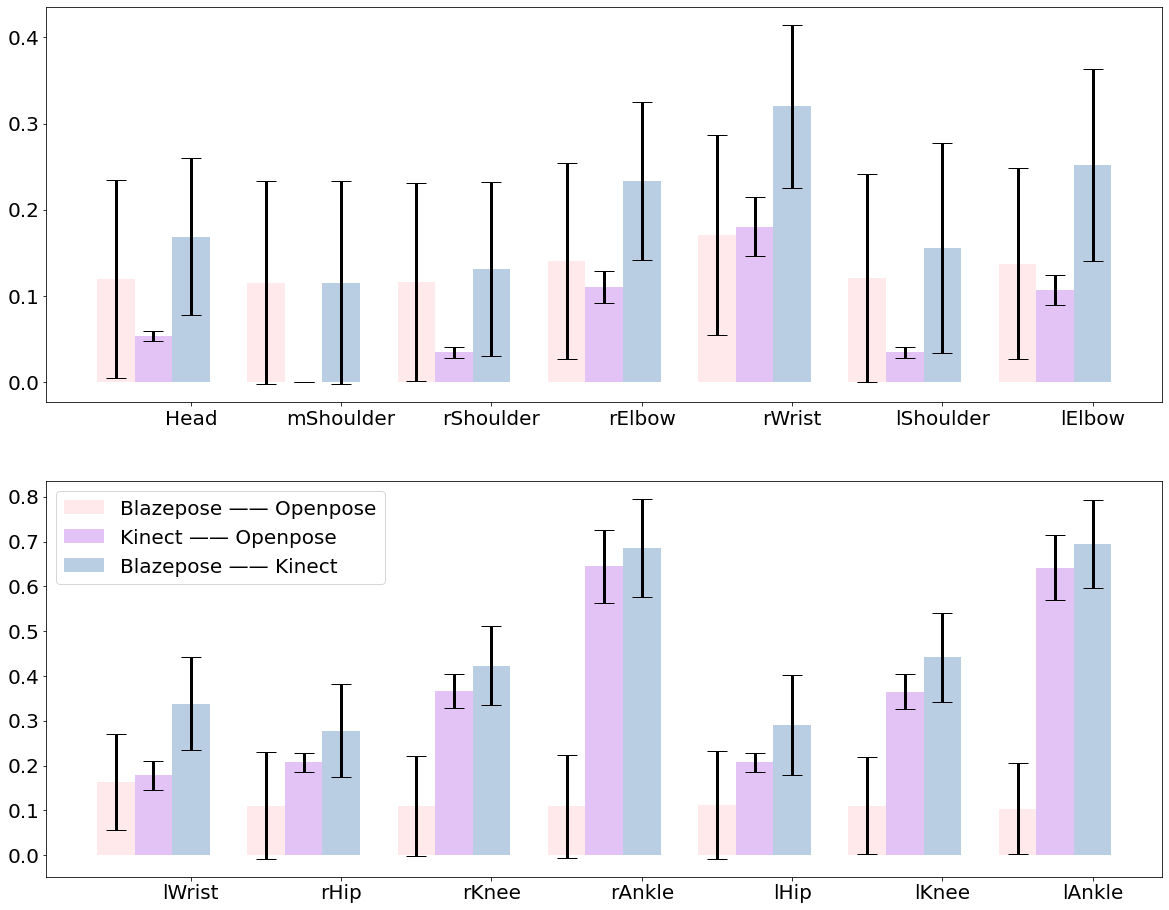

In [58]:
# Visual_group = ["group1A", "group2A"]
from turtle import color


if not os.path.exists("../results/graphs"):
    os.mkdir("../results/graphs")
group_name = "group1A"
lib_type = ['Error_blazeOpen_par_mvt', 'Error_KintOpen_par_mvt', 'Error_blazeKint_avecP_par_mvt']
title_list = ["Blazepose —— Openpose", "Kinect —— Openpose", "Blazepose —— Kinect"]
tmp = 0
print(Error[group_name].keys())
err = []
std = []
for error_type in lib_type:
    label_x = list(Error[group_name][error_type].keys())
    err_tmp = []
    std_tmp = []
    for sklt in Error[group_name][error_type].keys():
        err_tmp.append(np.average(list(Error[group_name][error_type][sklt].values())))
        std_tmp.append(np.average(list(Error_std[group_name][error_type][sklt].values())))
    err_tmp = np.array(err_tmp)
    std_tmp = np.array(std_tmp)
    err_tmp[np.isnan(err_tmp)] = 0
    std_tmp[np.isnan(std_tmp)] = 0
    err.append(err_tmp)
    std.append(std_tmp)
plt.figure(figsize=(20,16))
plt.rcParams['font.size'] = '20'
color_my = ["#FFE9EA","#E3C3F5","#BACEE3"]
half = int(len(err[0])/2)
print(half)
x = np.array([2*(i+1) for i in range(half)])
width = 0.5
plt.subplot(211)
print(x-width)
for i in range(len(err)):
    plt.bar(x-width+i*width, err[i][:half], yerr = std[i][:half], label = title_list[i], color = color_my[i], 
            tick_label = label_x[:half], error_kw = dict(elinewidth=3, capsize=10), width = width)
plt.subplot(212)
for i in range(len(err)):
    plt.bar(x-width+i*width, err[i][half:], yerr = std[i][half:], label = title_list[i], color = color_my[i], 
            tick_label = label_x[half:], error_kw = dict(elinewidth=3, capsize=10), width = width)
plt.legend()
# plt.xlabel(mvt[i], fontsize=24)
# if i == 0:
#     plt.ylabel("Erreur", fontsize=24)
# if i == 1:
#     plt.title(title_list[tmp], fontsize=24)
#     tmp += 1 
plt.savefig("../results/graphs/total.png")
plt.show()

In [ ]:
# Visual_group = ["group1A", "group2A"]
if not os.path.exists("../results/graphs"):
    os.mkdir("../results/graphs")
group_name = "group1A"
mvt = ['CTK', 'ELK', 'RTK']
title_list = ["Blazepose —— Openpose", "Kinect —— Openpose","Blazepose —— Kinect", "Blazepose —— Kinect"]
tmp = 0
for error_type in Error[group_name].keys():
    print(error_type)
    plt.figure(figsize=(35,10))
    plt.rcParams['font.size'] = '20'
    color_my = cm.tab20.colors[:14]
    color_my = list(color_my)
    color_my.reverse()
    for i in range(len(mvt)):
        plt.subplot(1,3,i+1)
        err = []
        std = []
        label_x = list(Error[group_name][error_type].keys())
        for sklt in Error[group_name][error_type].keys():
            err.append(Error[group_name][error_type][sklt][mvt[i]])
            std.append(Error_std[group_name][error_type][sklt][mvt[i]])
            # print(group_name, dic_temp.keys())
        x = [i+1 for i in range(len(err))]
        err.reverse()
        std.reverse()
        label_x.reverse()
        plt.barh(x, err, xerr = std, tick_label = label_x, color = color_my, error_kw = dict(elinewidth=3, capsize=10))
        # plt.legend()
        plt.xlabel(mvt[i], fontsize=24)
        if i == 0:
            plt.ylabel("Erreur", fontsize=24)
        if i == 1:
            plt.title(title_list[tmp], fontsize=24)
            tmp += 1 
    plt.savefig("../results/graphs/"+error_type+".png")
plt.show()

# Tableau

erreur, standard deviation = kinect/open , open/blaze, blaze/kinect
lignes = mShoulder, rWrist

In group file

In [5]:
for group in Error.keys():
    csv_path = "../results/csvs/"+group+"_error_std.csv"
    field_order = ["error +-std"] + list(Error[group].keys())
    with open(csv_path, 'w', encoding="utf-8", newline='') as csvfile:
        writer = csv.DictWriter(csvfile, field_order)
        writer.writeheader()
        for articulation in ['lShoulder',"rShoulder","rWrist"]:
            aList_output = []
            aList_output.append(articulation)
            for eType in Error[group].keys():
                mean = format(np.mean(list(Error[group][eType][articulation].values())),".4f")
                std = format(np.mean(list(Error_std[group][eType][articulation].values())),".4f")
                aList_output.append(str(mean)+"+-"+str(std))
            writer.writerow(dict(zip(field_order, aList_output)))
    csvfile.close()

In one file

In [12]:
csv_path = "../results/csvs/"+"std.csv"
field_order = ["std"] + list(Error["group1A"].keys())
error_type = list(Error["group1A"].keys())
arti_list = list(Error["group1A"]['Error_blazeOpen_par_mvt'].keys())
with open(csv_path, 'w', encoding="utf-8", newline='') as csvfile:
    writer = csv.DictWriter(csvfile, field_order)
    writer.writeheader()
    for articulation in arti_list:
        aList_output = []
        aList_output.append(articulation)
        for eType in error_type:
            tmp_mean = []
            tmp_std = []
            for group in Error.keys():
                tmp_mean.append(list(Error[group][eType][articulation].values()))
                tmp_std.append(list(Error_std[group][eType][articulation].values()))
#             print("tmp_mean", tmp_mean)
            mean_out = format(np.mean(tmp_mean),".4f")
            std_out = format(np.mean(tmp_std),".4f")
#             aList_output.append(str(mean_out)+"+-"+str(std_out))
#             aList_output.append(mean_out)
            aList_output.append(std_out)
        print(aList_output)
        writer.writerow(dict(zip(field_order, aList_output)))
csvfile.close()

['Head', '0.1245', '0.0091', '0.1137', '0.1026']
['mShoulder', '0.1250', 'nan', '0.1248', '0.1248']
['rShoulder', '0.1231', '0.0068', '0.1198', '0.1148']
['rElbow', '0.1208', '0.0203', '0.1069', '0.0999']
['rWrist', '0.1243', '0.0396', '0.1023', '0.0990']
['lShoulder', '0.1248', '0.0068', '0.1280', '0.1228']
['lElbow', '0.1213', '0.0193', '0.1247', '0.1149']
['lWrist', '0.1169', '0.0361', '0.1168', '0.1079']
['rHip', '0.1157', '0.0312', '0.0998', '0.0954']
['rKnee', '0.1137', '0.0517', '0.0908', '0.0984']
['rAnkle', '0.1156', '0.0899', '0.1152', '0.1121']
['lHip', '0.1161', '0.0311', '0.1059', '0.1008']
['lKnee', '0.1108', '0.0520', '0.1016', '0.1002']
['lAnkle', '0.1075', '0.0879', '0.1124', '0.1102']


In [13]:
csv_path = "../results/csvs/"+"error.csv"
field_order = ["std"] + list(Error["group1A"].keys())
error_type = list(Error["group1A"].keys())
arti_list = list(Error["group1A"]['Error_blazeOpen_par_mvt'].keys())
with open(csv_path, 'w', encoding="utf-8", newline='') as csvfile:
    writer = csv.DictWriter(csvfile, field_order)
    writer.writeheader()
    for articulation in arti_list:
        aList_output = []
        aList_output.append(articulation)
        for eType in error_type:
            tmp_mean = []
            tmp_std = []
            for group in Error.keys():
                tmp_mean.append(list(Error[group][eType][articulation].values()))
                tmp_std.append(list(Error_std[group][eType][articulation].values()))
#             print("tmp_mean", tmp_mean)
            mean_out = format(np.mean(tmp_mean),".4f")
            std_out = format(np.mean(tmp_std),".4f")
#             aList_output.append(str(mean_out)+"+-"+str(std_out))
            aList_output.append(mean_out)
#             aList_output.append(std_out)
        print(aList_output)
        writer.writerow(dict(zip(field_order, aList_output)))
csvfile.close()

['Head', '0.1513', '0.0589', '0.1610', '0.1998']
['mShoulder', '0.1447', 'nan', '0.1437', '0.1437']
['rShoulder', '0.1450', '0.0368', '0.1270', '0.1499']
['rElbow', '0.1705', '0.1193', '0.1636', '0.2469']
['rWrist', '0.2027', '0.1995', '0.2194', '0.3335']
['lShoulder', '0.1488', '0.0367', '0.1690', '0.1884']
['lElbow', '0.1706', '0.1174', '0.2215', '0.2856']
['lWrist', '0.1958', '0.1991', '0.2735', '0.3698']
['rHip', '0.1378', '0.2163', '0.2773', '0.2953']
['rKnee', '0.1388', '0.3734', '0.4050', '0.4669']
['rAnkle', '0.1373', '0.6661', '0.6830', '0.7374']
['lHip', '0.1377', '0.2162', '0.2932', '0.3118']
['lKnee', '0.1362', '0.3743', '0.4378', '0.4868']
['lAnkle', '0.1330', '0.6673', '0.7063', '0.7527']


In [4]:
csv_path = "../results/csvs/"+"error_std.csv"
field_order = ["std"] + list(Error["group1A"].keys())
error_type = list(Error["group1A"].keys())
arti_list = list(Error["group1A"]['Error_blazeOpen_par_mvt'].keys())
with open(csv_path, 'w', encoding="utf-8", newline='') as csvfile:
    writer = csv.DictWriter(csvfile, field_order)
    writer.writeheader()
    for articulation in arti_list:
        aList_output = []
        aList_output.append(articulation)
        for eType in error_type:
            tmp_mean = []
            tmp_std = []
            for group in Error.keys():
                tmp_mean.append(list(Error[group][eType][articulation].values()))
                tmp_std.append(list(Error_std[group][eType][articulation].values()))
#             print("tmp_mean", tmp_mean)
            mean_out = format(np.mean(tmp_mean),".4f")
            std_out = format(np.mean(tmp_std),".4f")
            aList_output.append(str(mean_out)+"+-"+str(std_out))
#             aList_output.append(mean_out)
#             aList_output.append(std_out)
        print(aList_output)
        writer.writerow(dict(zip(field_order, aList_output)))
csvfile.close()

['Head', '0.1513+-0.1245', '0.0589+-0.0091', '0.1610+-0.1137', '0.1998+-0.1026']
['mShoulder', '0.1447+-0.1250', 'nan+-nan', '0.1437+-0.1248', '0.1437+-0.1248']
['rShoulder', '0.1450+-0.1231', '0.0368+-0.0068', '0.1270+-0.1198', '0.1499+-0.1148']
['rElbow', '0.1705+-0.1208', '0.1193+-0.0203', '0.1636+-0.1069', '0.2469+-0.0999']
['rWrist', '0.2027+-0.1243', '0.1995+-0.0396', '0.2194+-0.1023', '0.3335+-0.0990']
['lShoulder', '0.1488+-0.1248', '0.0367+-0.0068', '0.1690+-0.1280', '0.1884+-0.1228']
['lElbow', '0.1706+-0.1213', '0.1174+-0.0193', '0.2215+-0.1247', '0.2856+-0.1149']
['lWrist', '0.1958+-0.1169', '0.1991+-0.0361', '0.2735+-0.1168', '0.3698+-0.1079']
['rHip', '0.1378+-0.1157', '0.2163+-0.0312', '0.2773+-0.0998', '0.2953+-0.0954']
['rKnee', '0.1388+-0.1137', '0.3734+-0.0517', '0.4050+-0.0908', '0.4669+-0.0984']
['rAnkle', '0.1373+-0.1156', '0.6661+-0.0899', '0.6830+-0.1152', '0.7374+-0.1121']
['lHip', '0.1377+-0.1161', '0.2162+-0.0311', '0.2932+-0.1059', '0.3118+-0.1008']
['lKnee'

# Table Vicon

In [14]:
Error_Vicon_mean = '../results/pkls/Error_Vicon_mean.pkl'
Error_Vicon_std = '../results/pkls/Error_VIcon_std.pkl'

with open(Error_Vicon_mean, 'rb') as g:
    Error_mean = pkl.load(g)
g.close()
with open(Error_Vicon_std, 'rb') as f:
    Error_std = pkl.load(f)
f.close()

In [15]:
csv_path = "../results/csvs/"+"errorVicon_mean_std.csv"
field_order = ["mean+-std"] + list(Error_mean.keys())
error_type = list(Error_mean.keys())
arti_list = list(Error_mean['Error_blazeVicon'].keys())
with open(csv_path, 'w', encoding="utf-8", newline='') as csvfile:
    writer = csv.DictWriter(csvfile, field_order)
    writer.writeheader()
    for articulation in arti_list:
        aList_output = []
        aList_output.append(articulation)
        for eType in error_type:
#             print(Error_mean[eType])
            mean_out = format(Error_mean[eType][articulation],".4f")
            std_out = format(Error_std[eType][articulation],".4f")
            aList_output.append(str(mean_out)+"+-"+str(std_out))
#             aList_output.append(mean_out)
#             aList_output.append(std_out)
        print(aList_output)
        writer.writerow(dict(zip(field_order, aList_output)))
csvfile.close()

['Right_Forearm', '0.3102+-0.0694', '0.3232+-0.0644', '0.1423+-0.0387']
['Left_Forearm', '0.3290+-0.0884', '0.1899+-0.0573', '0.2490+-0.0742']
['Right_Arm', '0.2282+-0.0616', '0.2788+-0.0442', '0.0880+-0.0228']
['Left_Arm', '0.2931+-0.0571', '0.1364+-0.0378', '0.2425+-0.0458']
['Chest', '0.1368+-0.0198', '0.1097+-0.0188', '0.0799+-0.0093']
['Right_Tigh', '0.1611+-0.0332', '0.0862+-0.0333', '0.1510+-0.0369']
['Left_Tigh', '0.1036+-0.0372', '0.1457+-0.0382', '0.0666+-0.0514']
['Right_Shoulder', '0.2436+-0.0525', '0.2456+-0.0381', '0.1159+-0.0204']
['Left_Shoulder', '0.2802+-0.0429', '0.1777+-0.0285', '0.1937+-0.0179']
['Right_Hand', '0.4125+-0.0811', '0.3731+-0.0848', 'nan+-nan']
['Left_Hand', '0.3914+-0.1423', '0.2677+-0.0757', 'nan+-nan']
['Right_Foot', '0.3607+-0.0996', '0.2078+-0.0866', 'nan+-nan']
['Left_Foot', '0.2800+-0.1132', '0.3246+-0.0845', 'nan+-nan']
['Hips', 'nan+-nan', 'nan+-nan', 'nan+-nan']
['Head', '0.4217+-0.0586', '0.2913+-0.0423', '0.2037+-0.0247']
['Right_Tibia', '0